In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Tree_Species_Dataset-2'

In [ ]:
import os

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset-2"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))


Contents: ['shirish', 'khajur', 'cactus', 'asopalav', 'nilgiri', 'sonmahor', 'neem', 'babul', 'motichanoti', 'sugarcane', 'other', 'amla', 'champa', 'pipal', 'simlo', 'banyan', 'mango', 'bamboo', 'garmalo', 'pilikaren', 'bili', 'coconut', 'sitafal', 'saptaparni', 'gunda', 'kesudo', 'kanchan', 'jamun', 'vad', 'gulmohor']


In [ ]:
class_dirs = os.listdir(repo_path)


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1610


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


          Image Count
other             150
cactus             60
khajur             50
asopalav           50
nilgiri            50
shape:  (30, 1)


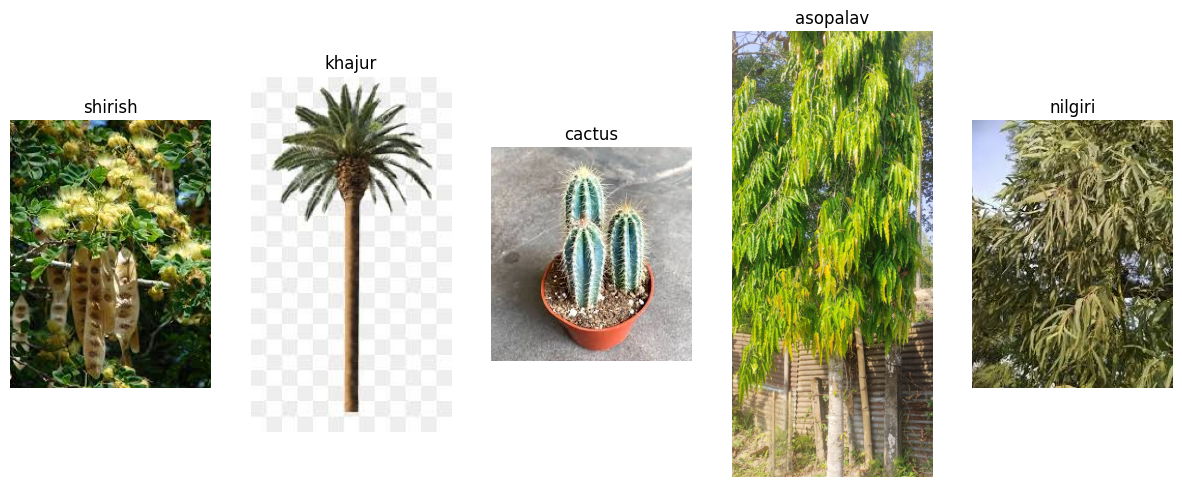

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [ ]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

Width  Height
0    194     259
1    204     247
2    241     209
3    194     259
4    275     183

In [ ]:
print(shapes_df.describe())


             Width       Height
count  1610.000000  1610.000000
mean    312.001863   269.547205
std     295.410756   277.184494
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 92


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 0


Duplicate set 1:


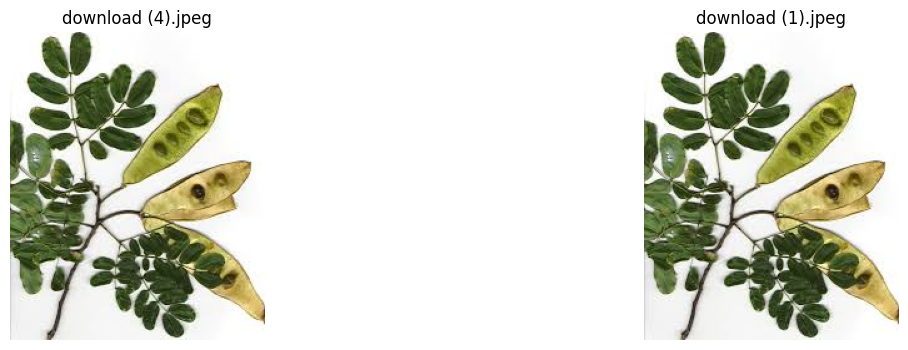

Duplicate set 2:


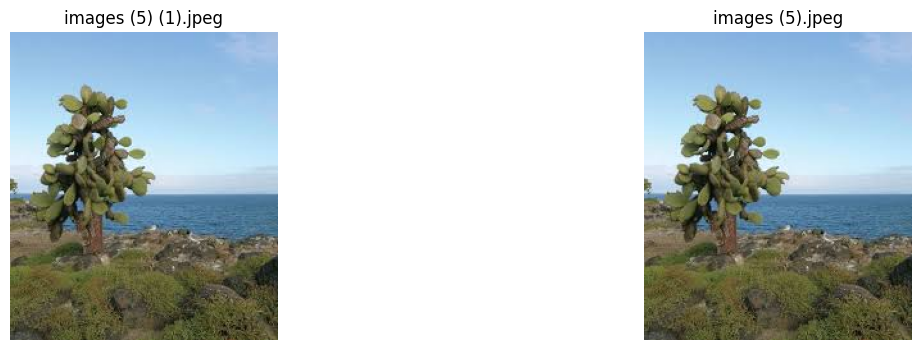

Duplicate set 3:


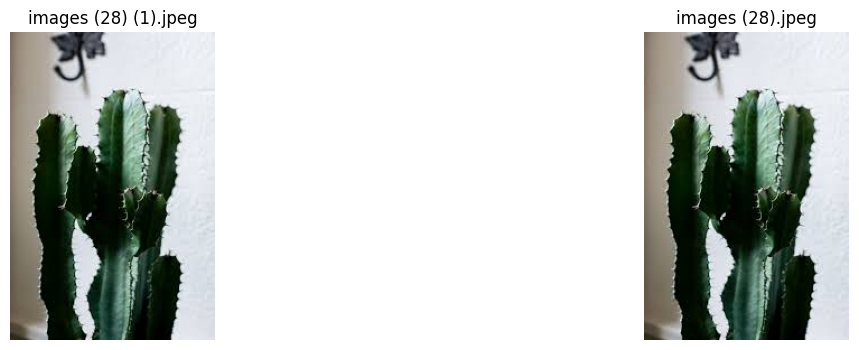

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 96 duplicate images.


In [ ]:

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd


image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


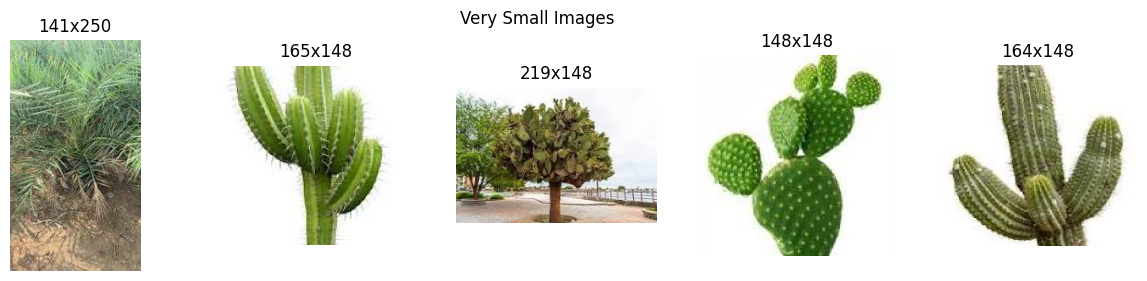

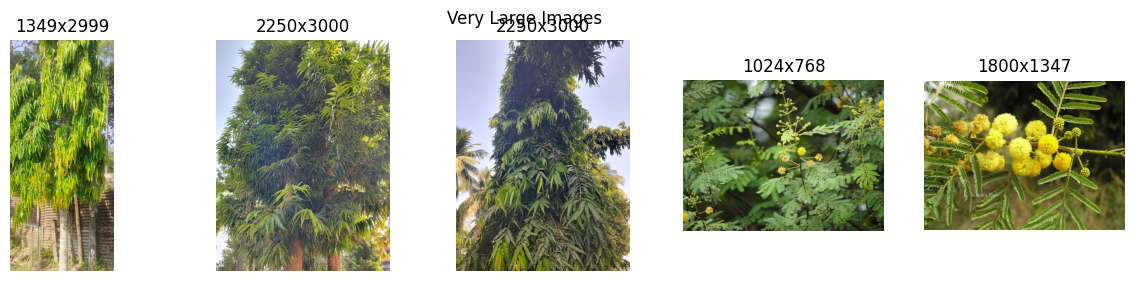

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [ ]:
import os


outliers = pd.concat([small_imgs, large_imgs])


removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f" Removed {removed_count} outlier images (small + large).")


 Removed 60 outlier images (small + large).


In [ ]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.0476 - loss: 3.4348 - val_accuracy: 0.0903 - val_loss: 3.3869
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.0809 - loss: 3.4086 - val_accuracy: 0.0903 - val_loss: 3.3820
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.0708 - loss: 3.4003 - val_accuracy: 0.0903 - val_loss: 3.3808
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0949 - loss: 3.3905 - val_accuracy: 0.0903 - val_loss: 3.3791
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0802 - loss: 3.3842 - val_accuracy: 0.0903 - val_loss: 3.3775
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0824 - loss: 3.3803 - val_accuracy: 0.0903 - val_loss: 3.3757
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0786 - loss: 3.3877 - val_accuracy: 0.0903 - val_loss: 3.3726
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0799 - loss: 3.3889 - val_accuracy: 0.0903 - v

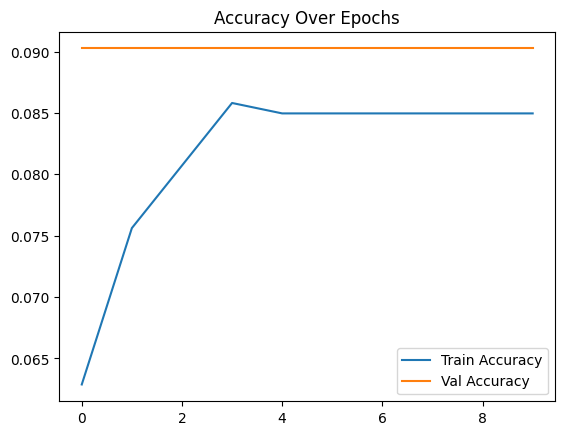

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

model.save("tree_species_model.h5")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 25
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.0707 - loss: 3.6028 - val_accuracy: 0.1372 - val_loss: 3.1977
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.1155 - loss: 3.1821 - val_accuracy: 0.1661 - val_loss: 3.0014
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.1406 - loss: 3.0233 - val_accuracy: 0.1588 - val_loss: 2.9096
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.1786 - loss: 2.9398 - val_accuracy: 0.2202 - val_loss: 2.7593
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.1858 - loss: 2.9065 - val_accuracy: 0.2599 - val_loss: 2.6767
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.2339 - loss: 2.6915 - val_accuracy: 0.2780 - val_loss: 2.6088
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.2570 - loss: 2.6012 - val_accuracy: 0.2599 - val_loss: 2.6576
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.2383 - loss: 2.6418 - val_accuracy: 0.2996 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 808s 22s/step - accuracy: 0.0537 - loss: 4.0175 - val_accuracy: 0.0939 - val_loss: 3.3145
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.1017 - loss: 3.2360 - val_accuracy: 0.1372 - val_loss: 3.0602
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.1262 - loss: 3.0668 - val_accuracy: 0.1444 - val_loss: 2.9299
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.1538 - loss: 2.9609 - val_accuracy: 0.1949 - val_loss: 2.8236
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.1920 - loss: 2.8647 - val_accuracy: 0.2238 - val_loss: 2.6799
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.1858 - loss: 2.8030 - val_accuracy: 0.2527 - val_loss: 2.6372
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.2588 - loss: 2.6319 - val_accuracy: 0.2383 - val_loss: 2.6483
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.2738 - loss: 2.6033 - val_accuracy: 0.2960 - 

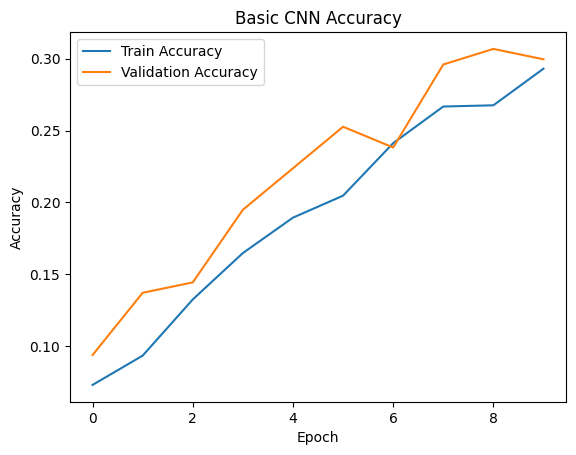

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf # Re-import tensorflow just in case
from tensorflow.keras.models import Sequential # Re-import for clarity
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# repo_path = "/content/drive/MyDrive/Tree_Species_Dataset-2"
# Define image properties (redefine for clarity)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators (redefine for clarity)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Assuming repo_path is defined in a previous cell and is accessible
train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes (redefine for clarity)
num_classes = train_generator.num_classes

# Build a basic CNN model (redefine for clarity)
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model (redefine history_cnn)
EPOCHS = 10 # You can adjust the number of epochs
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


# Plot accuracy/loss curves
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step - accuracy: 0.1014 - loss: 5.3059 - val_accuracy: 0.0289 - val_loss: 6.4204
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.0973 - loss: 3.2569 - val_accuracy: 0.0289 - val_loss: 12.4740
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 242s 7s/step - accuracy: 0.1413 - loss: 3.1223 - val_accuracy: 0.0289 - val_loss: 16.3794
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.1312 - loss: 3.1326 - val_accuracy: 0.0289 - val_loss: 19.4103
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 233s 6s/step - accuracy: 0.1613 - loss: 3.0280 - val_accuracy: 0.0289 - val_loss: 18.9769
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 272s 7s/step - accuracy: 0.1595 - loss: 3.0535 - val_accuracy: 0.0325 - val_loss: 19.5589
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.1614 - loss: 3.0252 - val_accuracy: 0.0397 - val_loss: 19.8590
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 251s 7s/step - accuracy: 0.1760 - loss: 2.9661 - val_accuracy: 0.07

In [1]:
repo_path = "/content/drive/MyDrive/Tree_Species_Dataset-2"